In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans

# Exploring Dataset

In [3]:
image_df=pd.read_csv("C:\\Users\\admin\\Dropbox\\DS\\6.building-clustering-models-scikit-learn\\datasets\\train.csv")
image_df.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
image_df.shape

(42000, 785)

In [5]:
sorted(image_df['label'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
image_df['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [7]:
image_df_features=image_df.drop('label',axis=1)

In [8]:
image_df_label=image_df['label']

In [9]:
image_df_label.index

RangeIndex(start=0, stop=42000, step=1)

# Helper function to display image by i/p of index of image from df

In [10]:
#Helper function to display image by taking index of image in df as parameter,that image we want to display.
def display_image(index):
    #Print out digit/label corresponding to image
    print("digit: ",image_df_label[index])
    
    #Plot the image corresponds to label/digit
    plt.imshow(image_df_features.loc[index].values.reshape(28,28),cmap='Greys')

digit:  9


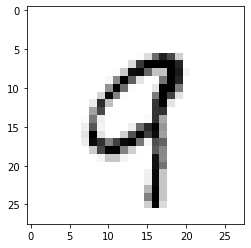

In [11]:
display_image(41999)

# Perform KMeans Clustering

In [12]:
#Instantiate k model,set n_clusters is 10 because 10 digits(0-9) is available
kmodel=KMeans(n_clusters=10,max_iter=1000)
#Call fit into i/p col from image_df_features
kmodel.fit(image_df_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
#Get centroids from above model store in var called kmodel_centroids:
kmodel_centroids=kmodel.cluster_centers_
kmodel_centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
kmodel_centroids.shape

(10, 784)

# Visualize the cluster centers
Each of the clusters are thought of image.Plot using matplotlib

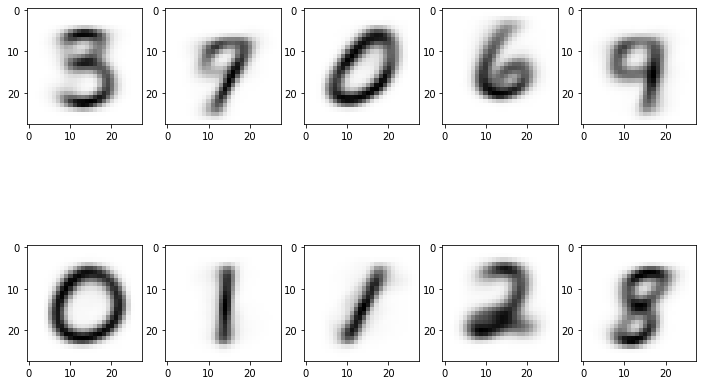

In [15]:
fig,ax=plt.subplots(figsize=(12,8))

#iterate through every centroid image 
for centroid in range(len(kmodel_centroids)):
    
    # centroid +1 otherwise,ValueError: num must be 1 <= num <= 10, not 0
    plt.subplot(2,5,centroid +1)
    
    #Display this centroid image using plt.imshow.
    #Cluster the image data representing images in the form of 1D array,Centroids also 1D array.So we reshape into 2D format(28x28)
    plt.imshow(kmodel_centroids[centroid].reshape(28,28),cmap='Greys')

In [16]:
np.unique(kmodel.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Use this for Prediction

In [17]:
#sample 10 original rows,assign it to iamge_df_test:
image_df_test=image_df.sample(10,replace=False)

#Separate labels and features into 2 var:
image_df_test_features=image_df_test.drop('label',axis=1)
image_df_test_label=image_df_test['label']


In [18]:
image_df_test_label

37952    5
18767    1
25122    4
40897    1
29404    6
14195    0
9716     9
18806    5
17008    0
41786    0
Name: label, dtype: int64

In [19]:
#Covert these object labels into array format
image_df_test_label=np.array(image_df_test_label)
image_df_test_label


array([5, 1, 4, 1, 6, 0, 9, 5, 0, 0], dtype=int64)

# KMeans Prediction

In [20]:
#Predict with i/p features store the clusters into pred_clusters
#kmodel is already instantiate and performed.so dont use new 1,if use, error:positional argument missing 'X'
pred_clusters=kmodel.predict(image_df_test_features)


In [21]:
#In order to see how many of predicted clusters map to actual digits for that set up df
pred_results=pd.DataFrame({'actual_digit':image_df_test_label,
                           'pred-cluster':pred_clusters})
pred_results

,actual_digit,pred-cluster
0,5,9
1,1,6
2,4,4
3,1,6
4,6,3
5,0,5
6,9,4
7,5,0
8,0,2
9,0,2


# Perform MiniBatchKMeans Clustering

In [22]:
#Instantiate MiniBatchKMeans estimator:
mk_model=MiniBatchKMeans(n_clusters=10,max_iter=10000,batch_size=100)

In [25]:
#AttributeError: 'MiniBatchKMeans' object has no attribute 'cluster_centers_'
#Assign KMeans centroids to this minibatchKMeans clustering centroids:
mk_model_centroids=kmodel_centroids
mk_model_centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
mk_model_centroids.shape

(10, 784)

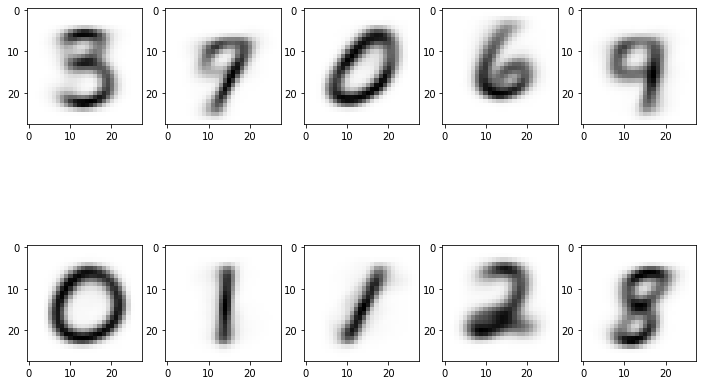

In [29]:
#Visulaize the cluster centroid image by plot use matplotlib:

fig,ax=plt.subplots(figsize=(12,8))
for centroid in range(len(mk_model_centroids)):
    plt.subplot(2,5,centroid +1)
    plt.imshow(mk_model_centroids[centroid].reshape(28,28),cmap='Greys')